# LABS

Usaremos el archivo iris.csv(https://gist.github.com/netj/8836201) que ya ha sido descargado y puede ser asesado a través del camino /data/iris.csv. Impórtelo a Python utilizando Pandas, de manera que pueda contestar (mediante el código respectivo) a las instrucciones siguientes. El ejercicio es divido en dos partes para explicación, más debe ser presentado con apenas un código:

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv('iris.csv')

# comience su código aquí:
# agrega lo que creas necesario, pero no olvides almacenar los valores en variables.

## Parte 1
Determine la media, desviación estándar y la mediana (percentil 50) para el ancho del pétalo por cada tipo de flor para aquellos registros cuyo ancho del sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5. Sigue estos pasos

- Filtre el dataframe para registros cuyo ancho del sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5. Almacena el resultado en la variable df_filtrado.

- Determine el número de registros del Dataframe df_filtrado y almacena en la variable registros.

- Calcule la media, mediana y desviación estándar para el ancho del pétalo por cada tipo de flor. Debes utilizar comandos de agrupamiento y agregación, a partir de la variable df_filtrado y almacenar el nuevo DataFrame en la variable agregados.

In [ ]:
# Filtre el dataframe para registros cuyo ancho del sépalo es mayor o igual a 3.5 y el largo del sépalo es mayor que 5
df_filtrado = df[(df['sepal.width'] >= 3.5) & (df['sepal.length'] > 5)]
df_filtrado

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
16,5.4,3.9,1.3,0.4,Setosa
17,5.1,3.5,1.4,0.3,Setosa
18,5.7,3.8,1.7,0.3,Setosa
19,5.1,3.8,1.5,0.3,Setosa
21,5.1,3.7,1.5,0.4,Setosa


In [8]:
# Determinar el número de registros en df_filtrado 
registros = df_filtrado.shape[0]
registros

20

In [13]:
# Calcular la media, mediana y desviación estándar para el ancho del pétalo por cada tipo de flor
agregados = df_filtrado.groupby('variety')['petal.width'].agg(['mean', 'median', 'std']).reset_index()
agregados

,variety,mean,median,std
0,Setosa,0.270588,0.2,0.098518
1,Virginica,2.233333,2.2,0.251661


## Parte 2

Ahora vamos a ejercitarnos creando una nueva columna usando operaciones vectoriales y cambiando el nombre de las columnas.

- Filtre el DataFrame df_filtrado para obtener registros apenas de las columnas 'variety', 'petal.width.st'

- Agregue una nueva columna al DataFrame df_filtrado generado al parte 1, que sea resultado de estandarizar los valores del ancho del pétalo para cada registro. Denomine a dicha columna petal.width.st y calcúlela de la siguiente manera:

    - (petal.width – Media(petal.width)) \ Desv. Estándar(petal.width)

Esto es, a cada observación de la columna petal.width se le resta su media de columna para luego dividir entre la desviación estándar de su columna.

- Filtre el DataFrame df_filtrado para obtener registros apenas de las columnas 'variety', 'petal.width.st' y almacena el resultado en la variable df_final.

- Renombre las columnas variety y petal.width.st del DataFrame df_final como Variedad y Ancho Est. Pétalo.

In [14]:
# Crear la columna petal.width.st
df_filtrado['petal.width.st'] = (df_filtrado['petal.width'] - df_filtrado['petal.width'].mean()) / df_filtrado['petal.width'].std()

# Filtrar las columnas 'variety' y 'petal.width.st'
df_final = df_filtrado[['variety', 'petal.width.st']]
df_final

,variety,petal.width.st
0,Setosa,-0.500485
5,Setosa,-0.226246
10,Setosa,-0.500485
14,Setosa,-0.500485
15,Setosa,-0.226246
16,Setosa,-0.226246
17,Setosa,-0.363366
18,Setosa,-0.363366
19,Setosa,-0.363366
21,Setosa,-0.226246


In [15]:
df_final.rename(columns={'variety': 'Variedad', 'petal.width.st': 'Ancho Est. Pétalo'}, inplace=True)
df_final

,Variedad,Ancho Est. Pétalo
0,Setosa,-0.500485
5,Setosa,-0.226246
10,Setosa,-0.500485
14,Setosa,-0.500485
15,Setosa,-0.226246
16,Setosa,-0.226246
17,Setosa,-0.363366
18,Setosa,-0.363366
19,Setosa,-0.363366
21,Setosa,-0.226246


Investigue cómo generar un gráfico de dispersión para la base original Iris que relacione la variable `petal.width` con `petal.length`. El gráfico debe ser almacenado en la variable `grafico`.
.plot(x,y,kind)`

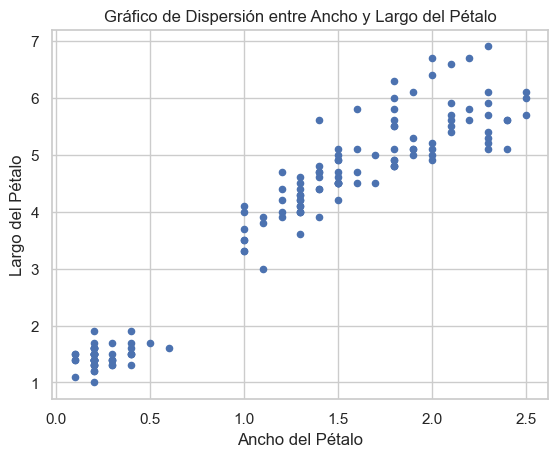

In [25]:
# Generar el gráfico de dispersión entre el ancho y largo del pétalo
grafico = df.plot.scatter(x='petal.width', y='petal.length', 
                          title='Gráfico de Dispersión entre Ancho y Largo del Pétalo',
                          xlabel='Ancho del Pétalo', ylabel='Largo del Pétalo')